### Importing Libraries

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
os.environ["OMP_NUM_THREADS"] = '1'


from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from pandas.plotting import table
import dataframe_image as dfi

from pathlib import Path
import pickle

import shap


### Selecting Path

In [8]:
def load_data(dataset, classifier):
    # Load dataset and change working directory
    path = Path(f'E:/Eighth Semester/EEE Capstone/8th Semester/{dataset}/{classifier}')
    os.chdir(path)

    df_encoded = pd.read_csv('df_encoded.csv')
    return df_encoded

def creating_cluster_data(df_encoded, classifier):
    
    # Run evaluation and save results
    with open(f'{classifier}_selected_features.pkl', 'rb') as f:
        corr_features, chi_sq_features, seq_fea_sel_features, rfe_cv_features = pickle.load(f)
    
    X = df_encoded[df_encoded['churn'] == 1].copy()
    # Select the relevant features for clustering
    X = X[seq_fea_sel_features]
    
    return X

def perform_kmeans(df: pd.DataFrame, n_clusters: int, target: str):
    """
    Function to perform k-means clustering
    """
    # let's assume that you want to cluster the data based on all other columns
    features = df

    # scale your features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features_scaled)

    # get the cluster assignments for each data point
    clusters = kmeans.labels_

    # add cluster assignments to the original dataframe
    df['Cluster'] = clusters
    
    return df

def shap_analysis(df: pd.DataFrame, target: str):
    """
    Function to perform SHAP analysis
    """
    # split your data into features and target
    X = df.drop(target, axis=1)
    y = df[target]

    # train a model
    model = RandomForestClassifier(random_state=0)
    model.fit(X, y)

    # create the explainer
    explainer = shap.TreeExplainer(model)

    # calculate shap values
    shap_values = explainer.shap_values(X)

    # plot
    shap.summary_plot(shap_values, X, plot_type="bar")
    shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)



def main():

    dataset = input("Enter dataset name: ")
    classifier = input("Enter classifier name: ")
    print("Dataset: ", dataset)
    print("Classifier: ", classifier)

    df_encoded = load_data(dataset, classifier)
    X = creating_cluster_data(df_encoded, classifier)

    # perform k-means clustering
    df_clustered = perform_kmeans(X, n_clusters=4, target='Churn')

    # perform SHAP analysis
    shap_analysis(df_clustered, target='Cluster')

Dataset:  Orange
Classifier:  RF


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


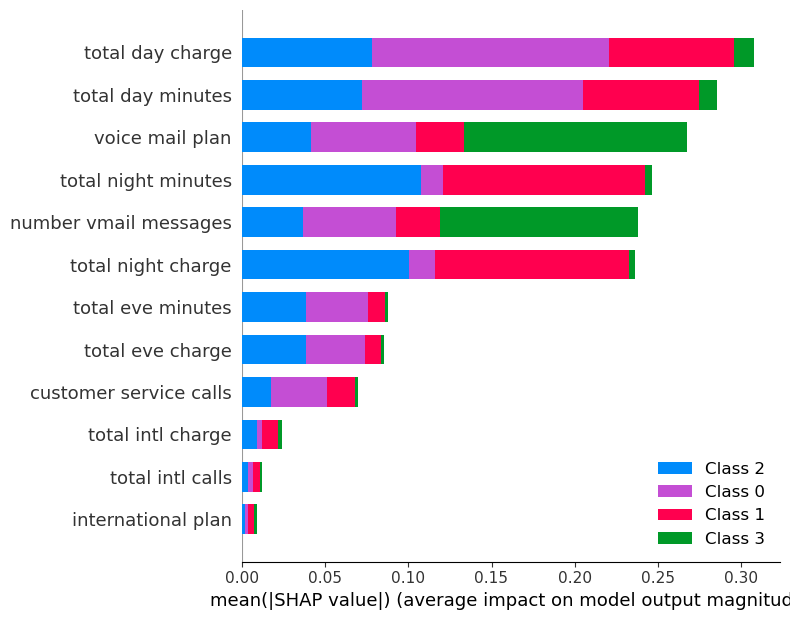

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


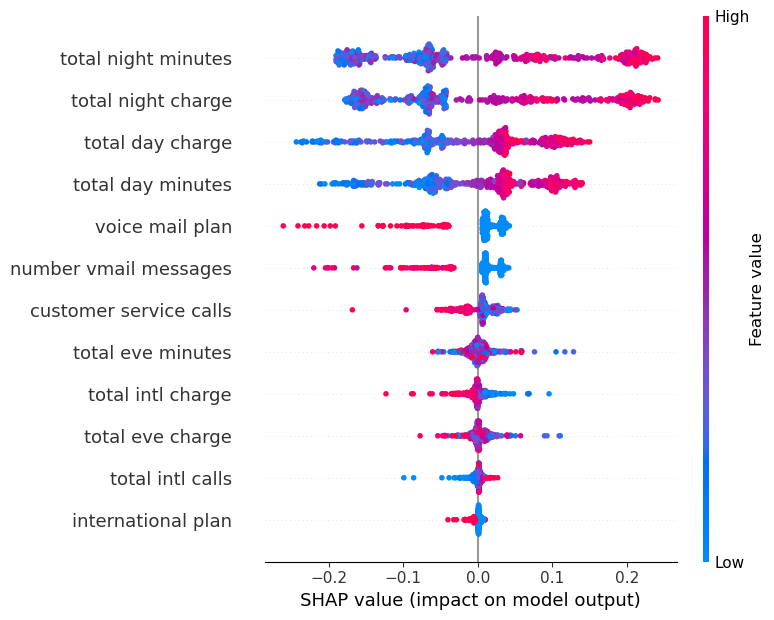

In [9]:
if __name__ == "__main__":
    main()